In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
#there are no null values
#type casting not needed
#in some categorical features,we have unknown label,which we will not remove or impute ,we will treat them as separate class

In [10]:
#as mentioned in feature description,duration column will not be useful for predictive analysis
#so,will drop the feature

In [11]:
df=df.drop(columns='duration')

In [12]:
#five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [13]:
#there is no much diff between mean and median values, so the distribution is fairly normal
#-ve values in employement variation rate indicates,there is cut down of employees
#-ve values in consumer confidence index indicates the instability of economy,in which people doesn't have much confidence

In [14]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
#there are no null values

In [16]:
#outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df[((df<ll)|(df>ul)).any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1043,41,technician,single,university.degree,unknown,no,no,telephone,may,wed,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,8,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1097,51,blue-collar,married,basic.4y,unknown,yes,no,telephone,may,wed,7,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,7,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41175,34,student,single,unknown,no,yes,no,cellular,nov,thu,1,999,2,failure,-1.1,94.767,-50.8,1.031,4963.6,no
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
#there are some outliers,but we will not remove them
#they are some type of customers who were contacted rarely

In [18]:
#target variable

In [19]:
print(df['y'].value_counts())
print(df['y'].value_counts()/df.shape[0]*100)

no     36548
yes     4640
Name: y, dtype: int64
no     88.734583
yes    11.265417
Name: y, dtype: float64


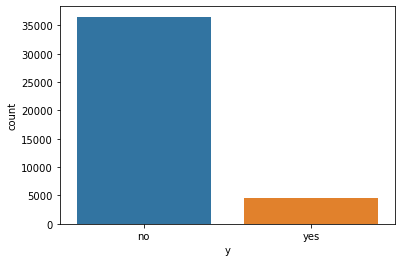

In [20]:
sns.countplot(x=df['y'])
plt.show()

In [21]:
#there is class imbalance in dataset
#this shows the campaign is not much successful,as most of the customers not subscribed for term deposits

In [22]:
df=df.rename(columns={'y':'subscription'})

# EDA

# UNIVARIATE ANALYSIS

In [23]:
def num_plot(col):
    plt.style.use('fivethirtyeight')
    fig=plt.figure(figsize=(15,10))
    fig.suptitle('Univariate analysis of {}'.format(col))
    gs = plt.GridSpec(nrows=2, ncols=4,figure=fig)
    plt.subplot(gs[0,:2])
    sns.distplot(x=df[col])
    plt.title('Distribution of {}'.format(col))
    plt.subplot(gs[0,2:4])
    sns.histplot(x=df[col],hue=df['subscription'],kde=True)
    plt.title('{} vs term deposit subscription'.format(col))
    plt.subplot(gs[1,0:4])
    sns.boxplot(x=df[col])
    plt.text(df[col].quantile(0.60),0.45,'mean: {:.2f}'.format(df[df['subscription']=='yes'][col].mean()))
    plt.text(df[col].quantile(0.60),0.55,'median: {:.2f}'.format(df[df['subscription']=='yes'][col].median()))
    plt.text(df[col].quantile(0.60),0.65,'mode: {:.2f}'.format(df[df['subscription']=='yes'][col].mode()[0]))
    plt.tight_layout()
    plt.show()
  

In [24]:
def cat_plot(col):
    fig=plt.figure(figsize=(15,10))
    plt.suptitle('Univariate analysis of {}'.format(col))
    plt.style.use('seaborn')
    gs = plt.GridSpec(nrows=2, ncols=4,figure=fig)
    plt.subplot(gs[0,:2])
    ax=sns.countplot(x=df[col],order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    total=df.shape[0]
    for i in ax.patches:
        percentage='{:.2f}%'.format(i.get_height()/total*100)
        x=i.get_width()+i.get_x()
        y=i.get_height()
        ax.annotate(percentage,xy=(x,y),ha='center')
    plt.subplot(gs[0,2:4])
    plt.pie(df[col].value_counts(),autopct='%.2f',labels=df[col].value_counts().index,rotatelabels=90,
            textprops={'fontsize':15},wedgeprops={'linewidth':10})
    plt.subplot(gs[1,:4])
    ax=sns.countplot(x=df[col],hue=df['subscription'],order=df[col].value_counts().index,palette={'yes':'green','no':'red'})
    plt.xticks(rotation=90)
    for i in ax.patches:
            percentage='{:.2f}%'.format(i.get_height()/total*100)
            x=i.get_width()+i.get_x()
            y=i.get_height()
            ax.annotate(percentage,xy=(x,y),ha='center')
    plt.tight_layout()
    plt.show()

# AGE

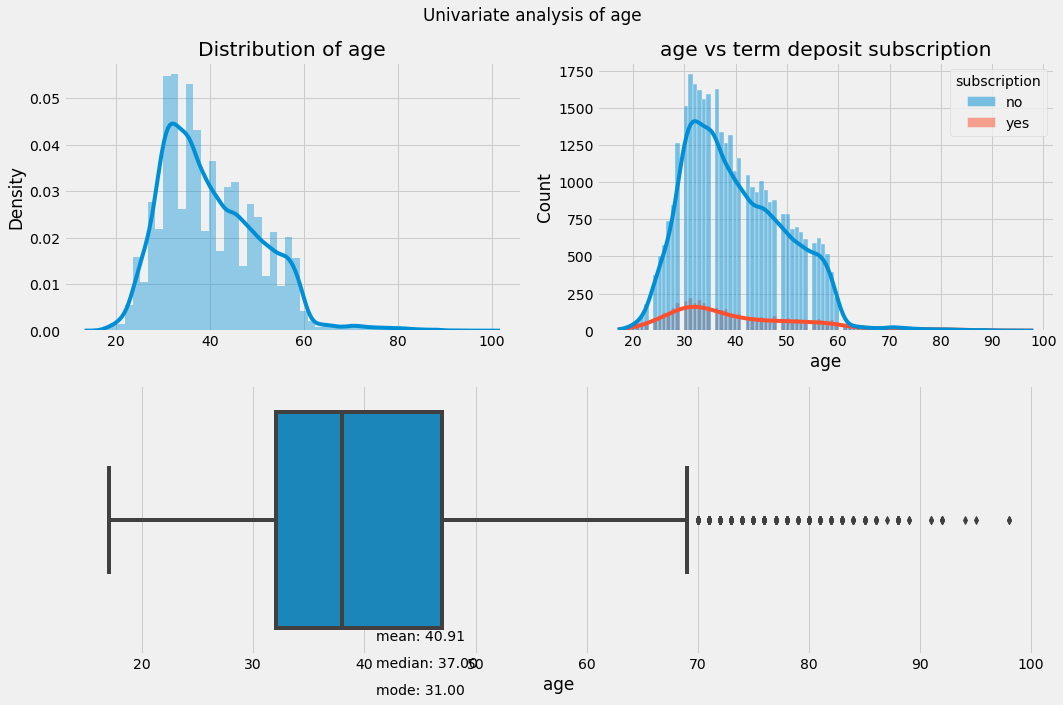

In [25]:
num_plot('age')

# Job

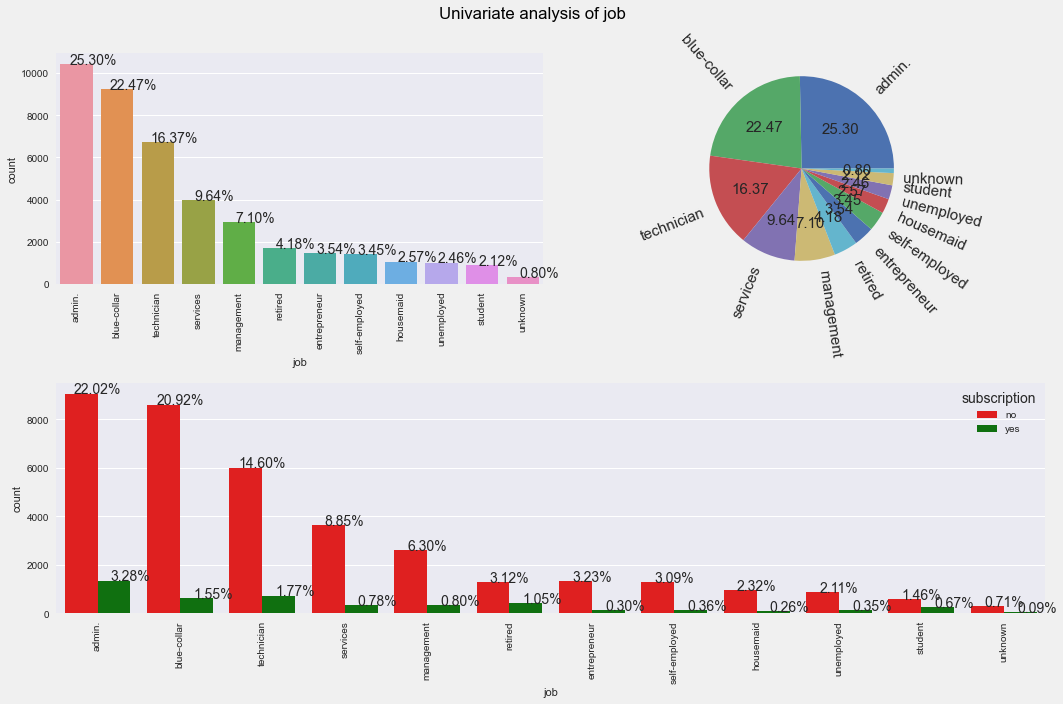

In [26]:
cat_plot('job')

# Marital status

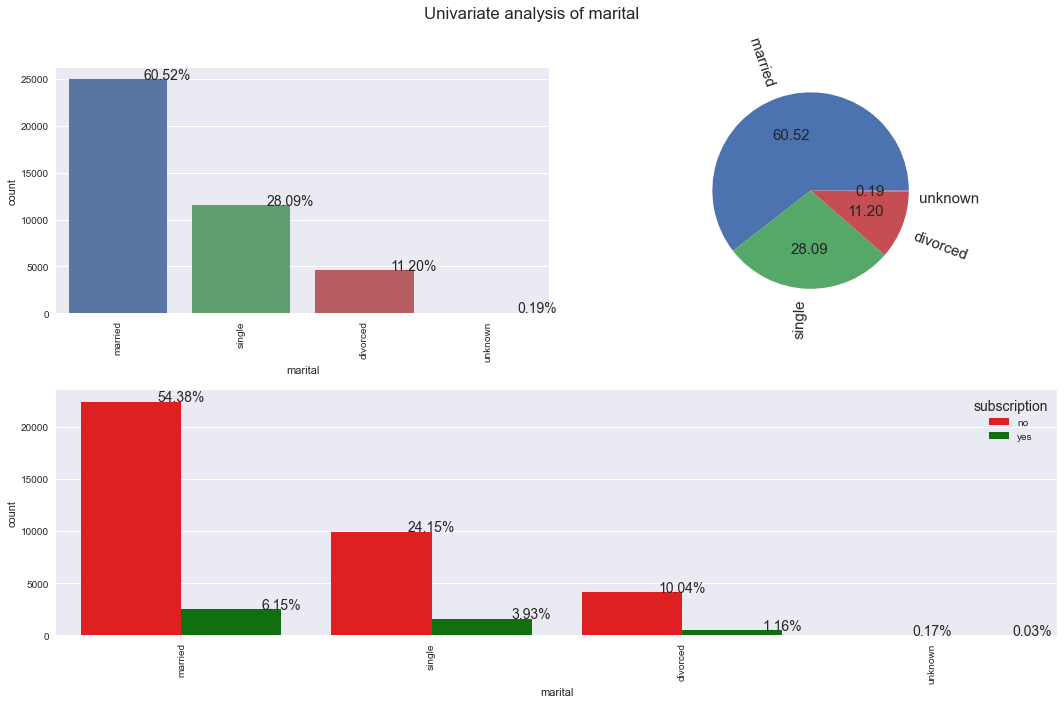

In [27]:
cat_plot('marital')

# Education

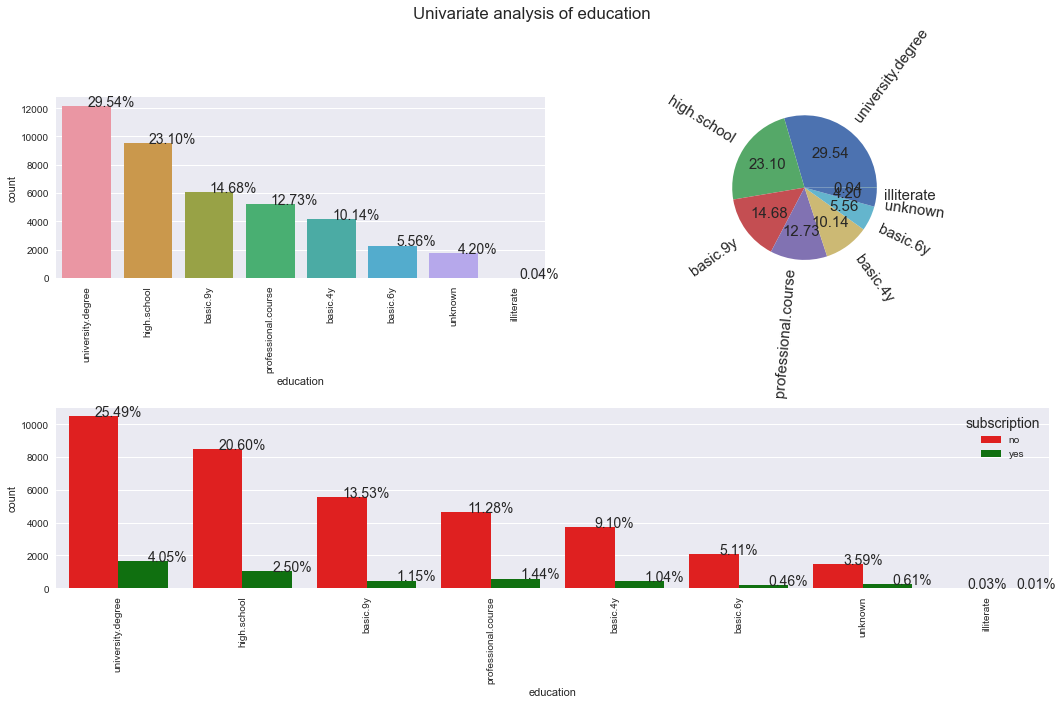

In [28]:
cat_plot('education')

# Default:Has credit card or not

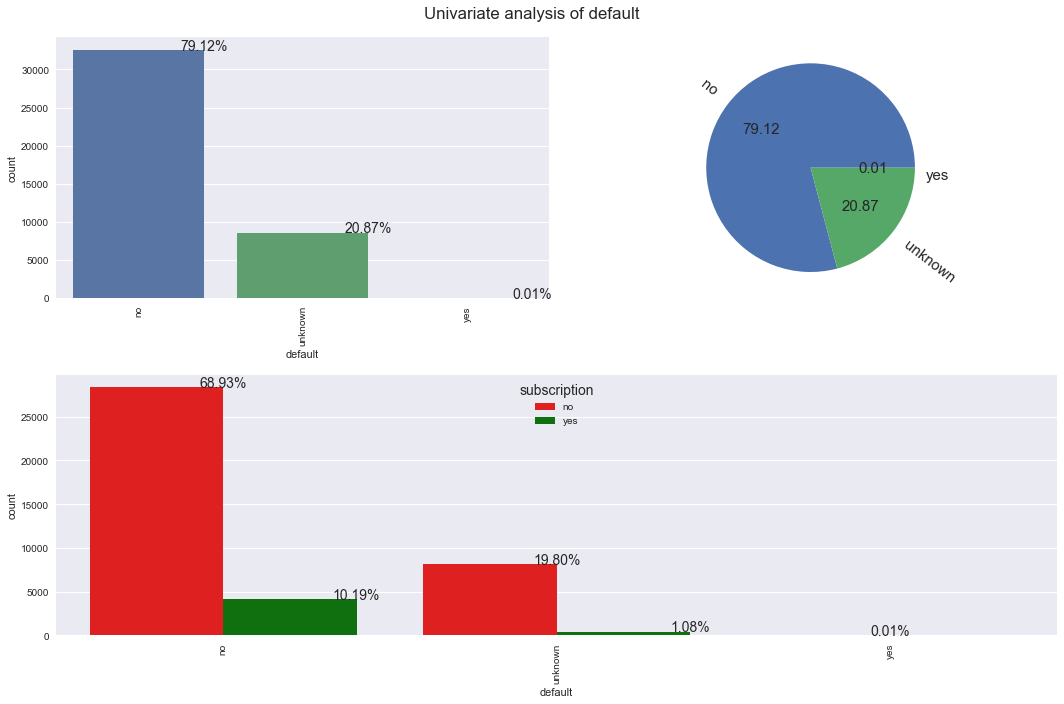

In [29]:
cat_plot('default')

# Housing: has housing loan or not

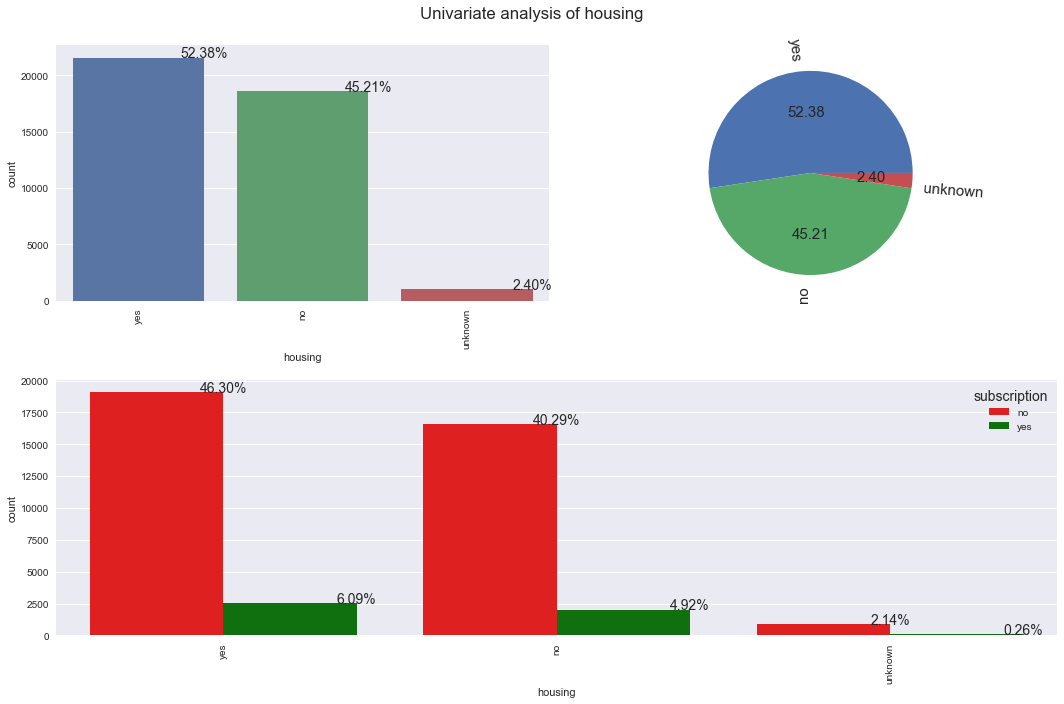

In [30]:
cat_plot('housing')

# Loan: has personal loan or not

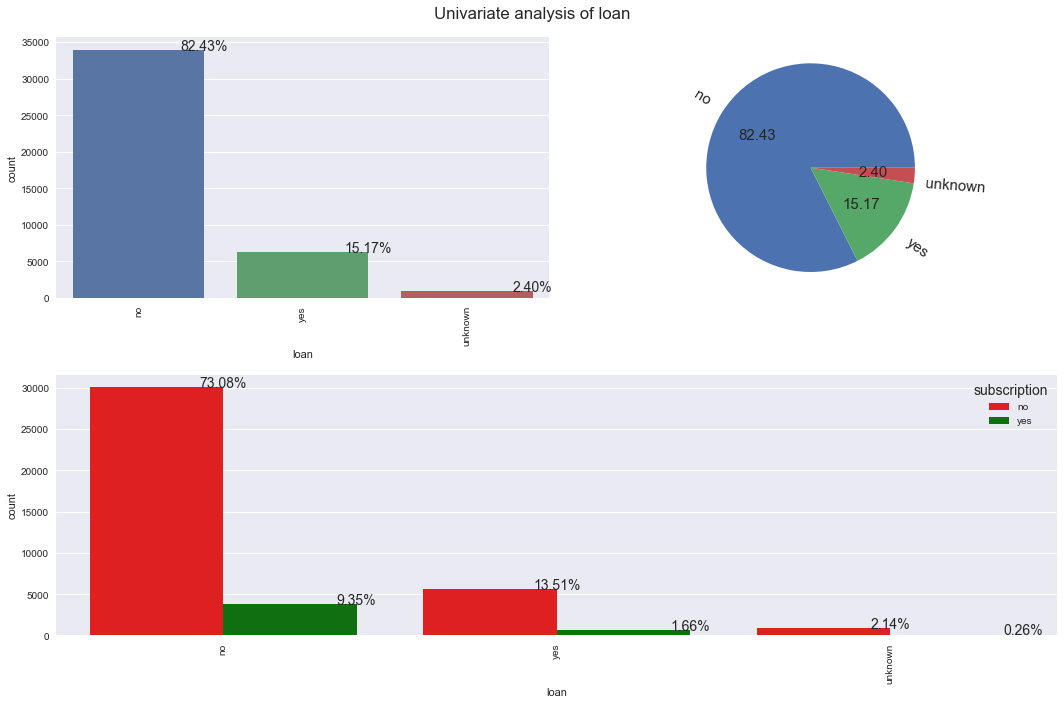

In [31]:
cat_plot('loan')

# contact: communication type(cellular,or telephone)

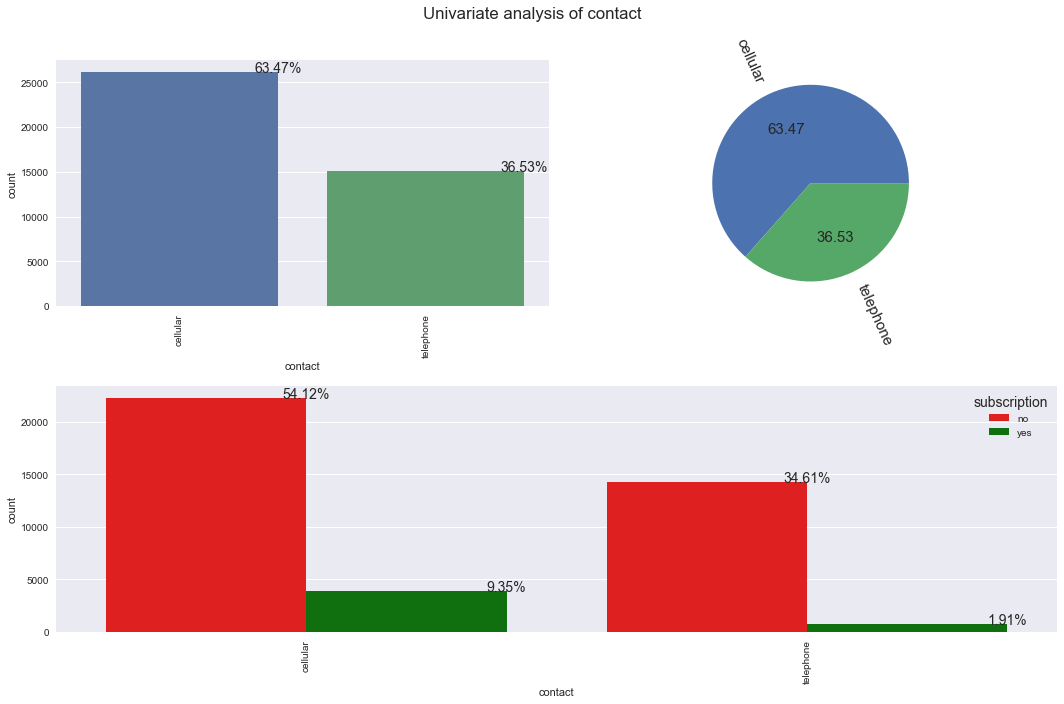

In [32]:
cat_plot('contact')

# Month: last contact month of year

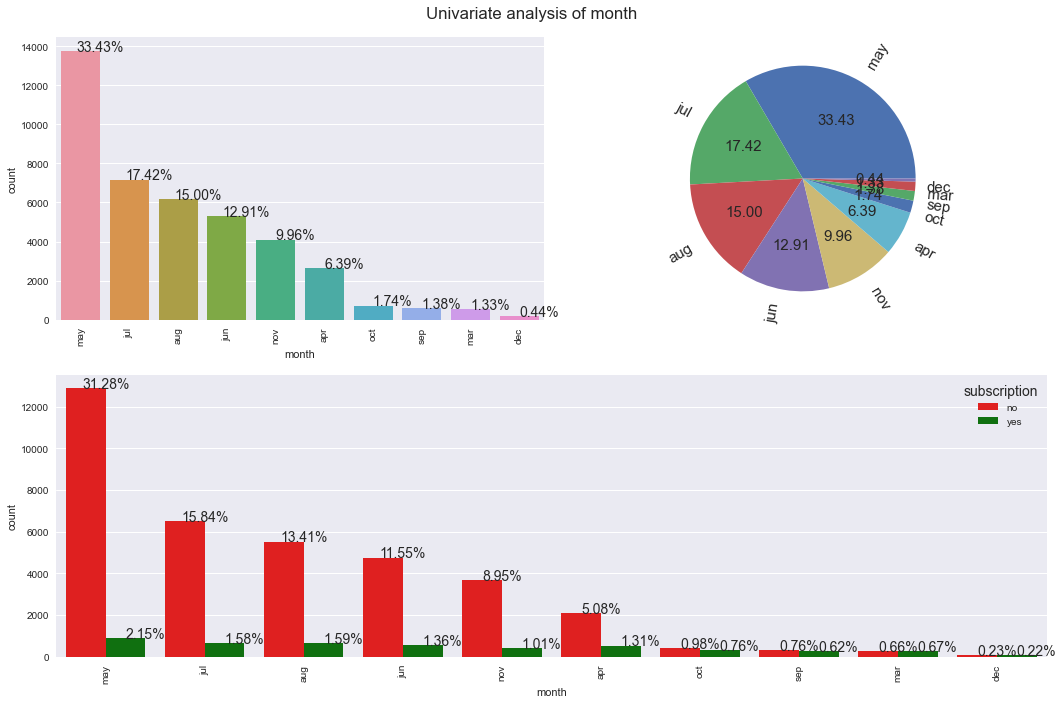

In [33]:
cat_plot('month')

# day of week: last contact day of week

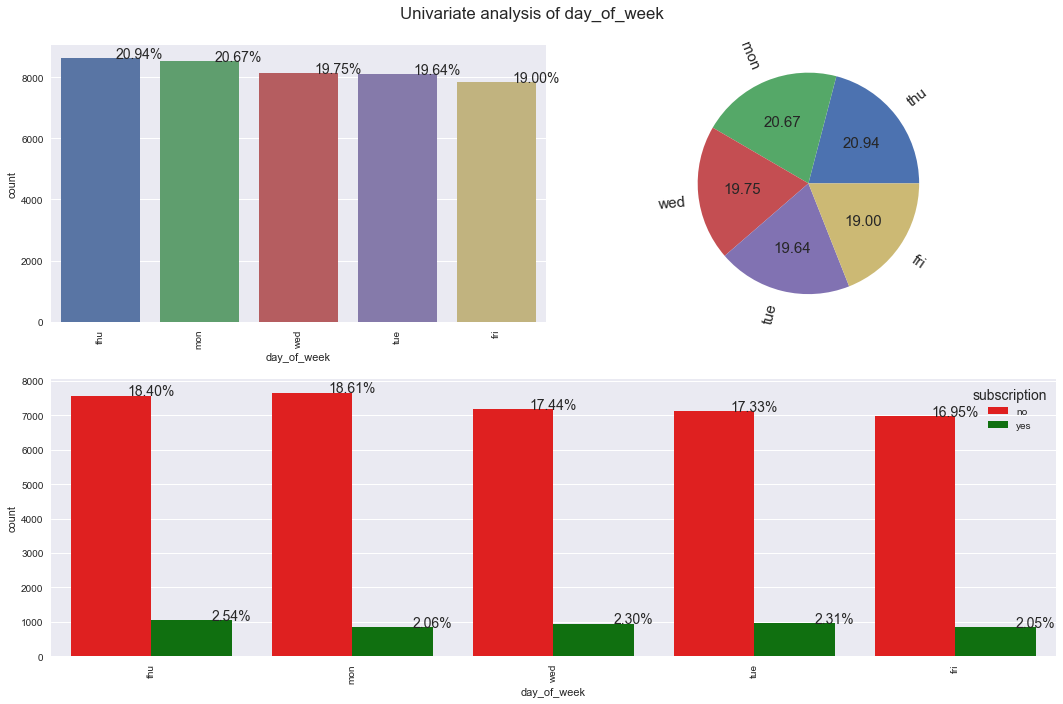

In [34]:
cat_plot('day_of_week')

# campaign: number of contacts performed during this campaign and for this client

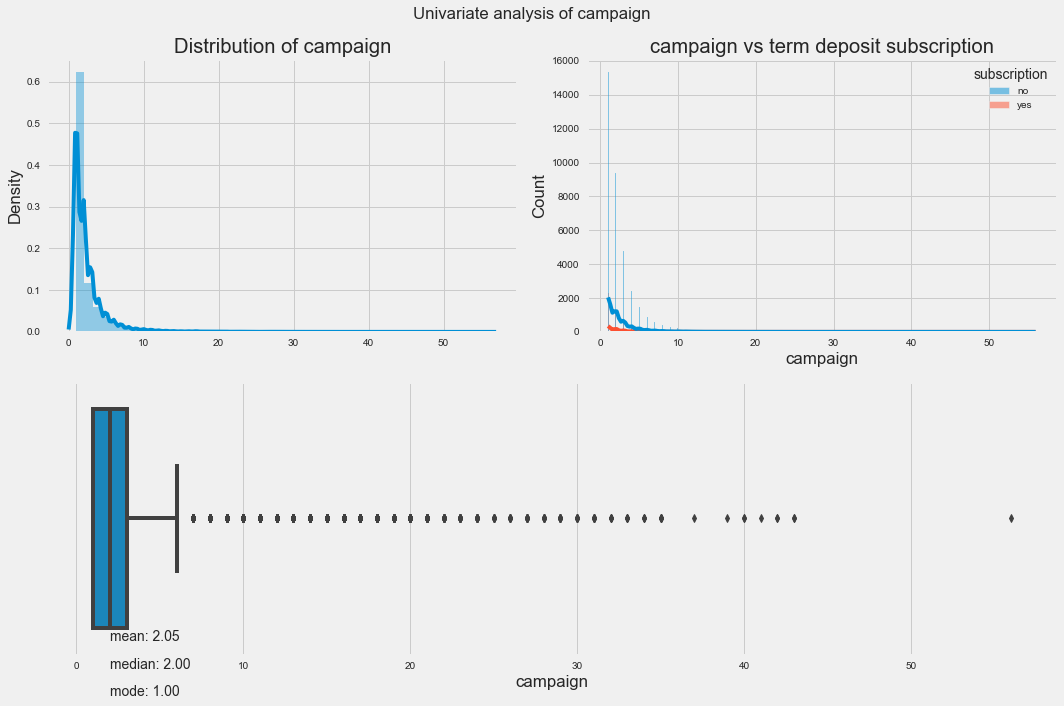

In [35]:
num_plot('campaign')

# pdays: number of days that passed by after the client was last contacted from a previous campaign

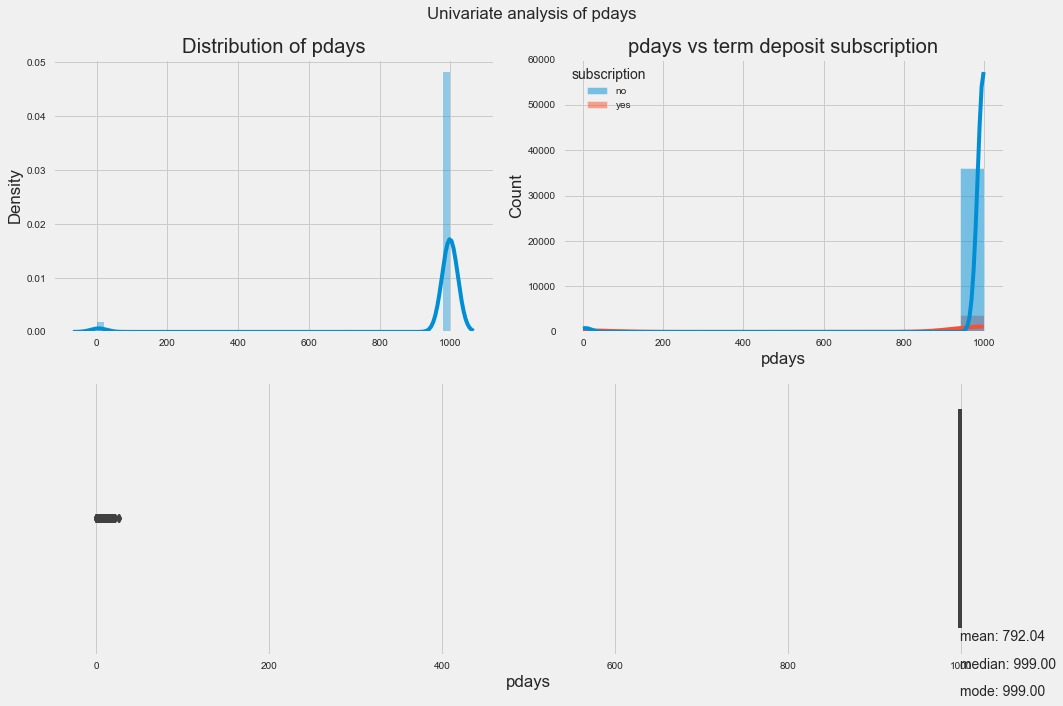

In [36]:
num_plot('pdays')

# previous: number of contacts performed before this campaign and for this client 

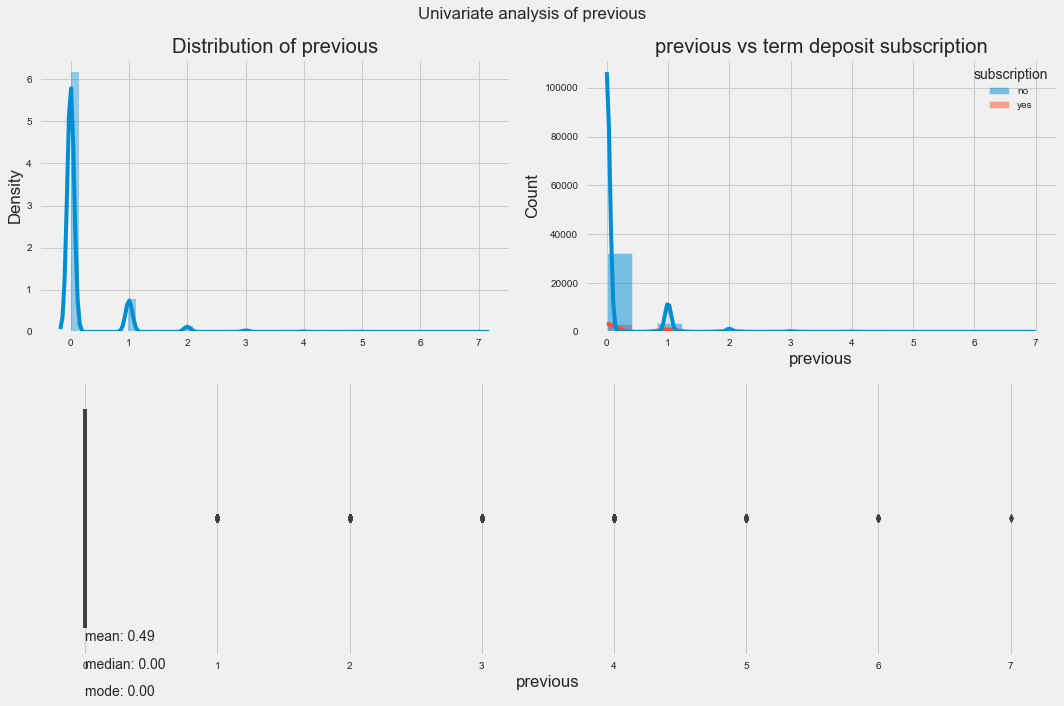

In [37]:
num_plot('previous')

# poutcome: outcome of the previous marketing campaign 

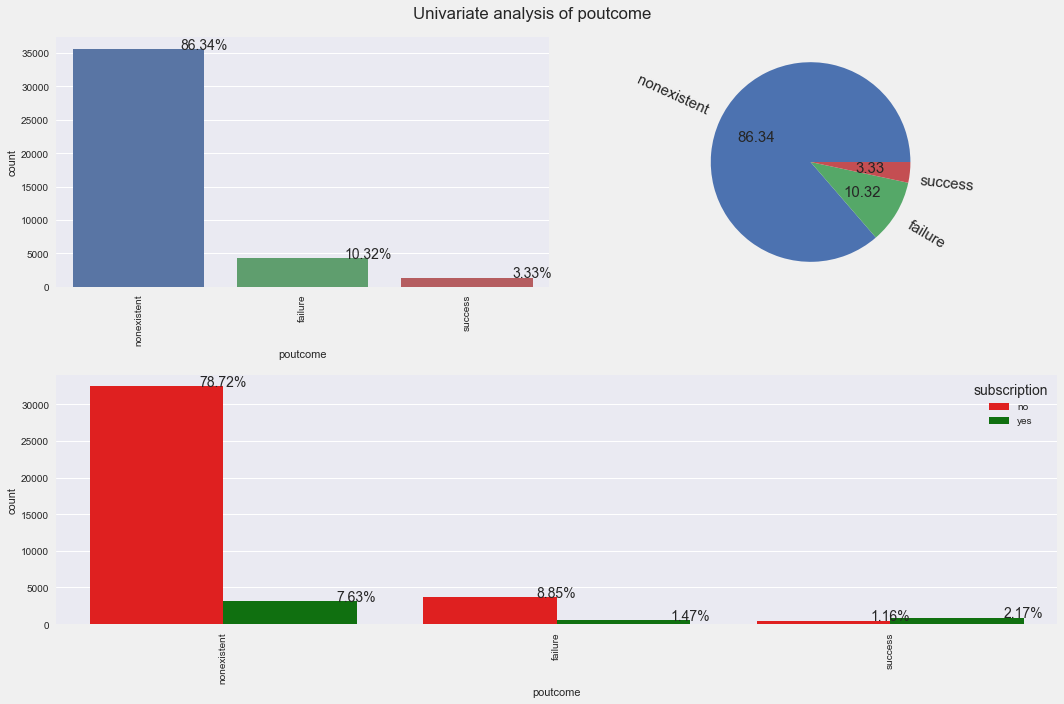

In [38]:
cat_plot('poutcome')

# emp.var.rate: employment variation rate - quarterly indicator

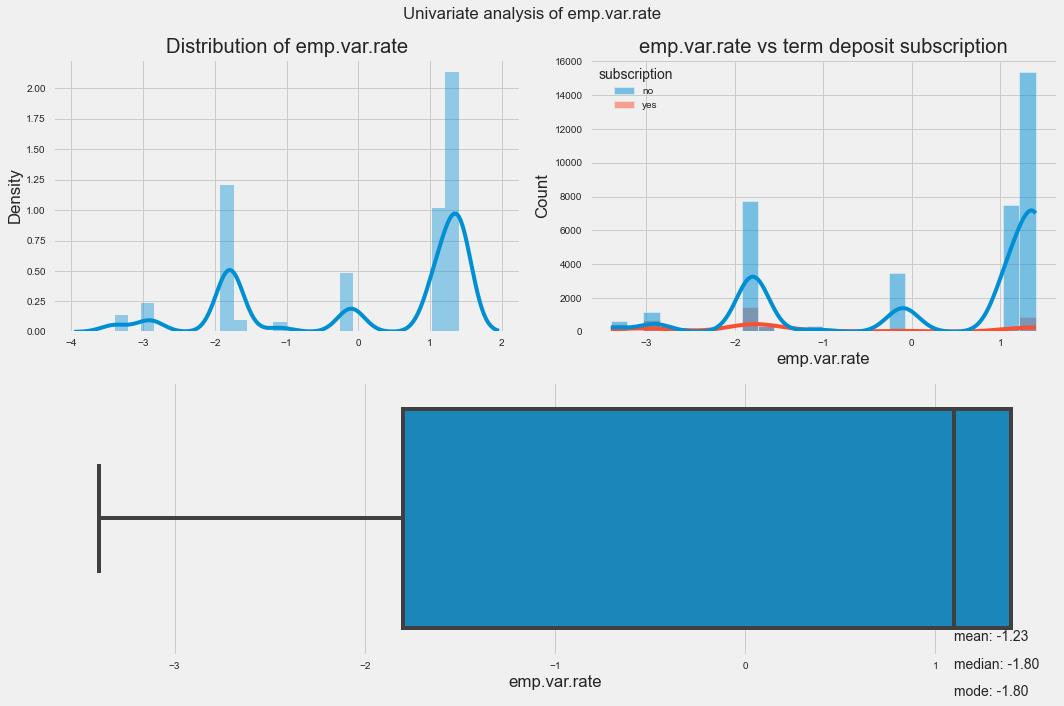

In [39]:
num_plot('emp.var.rate')

# cons.price.idx: consumer price index - monthly indicator

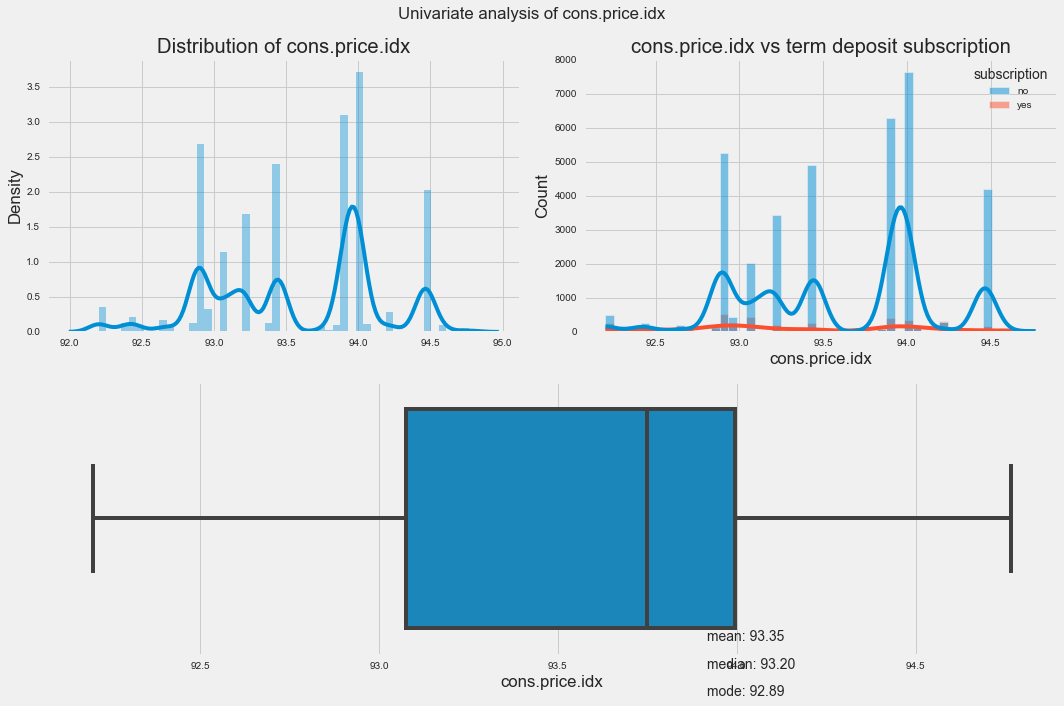

In [40]:
num_plot('cons.price.idx')

# cons.conf.idx: consumer confidence index - monthly indicator

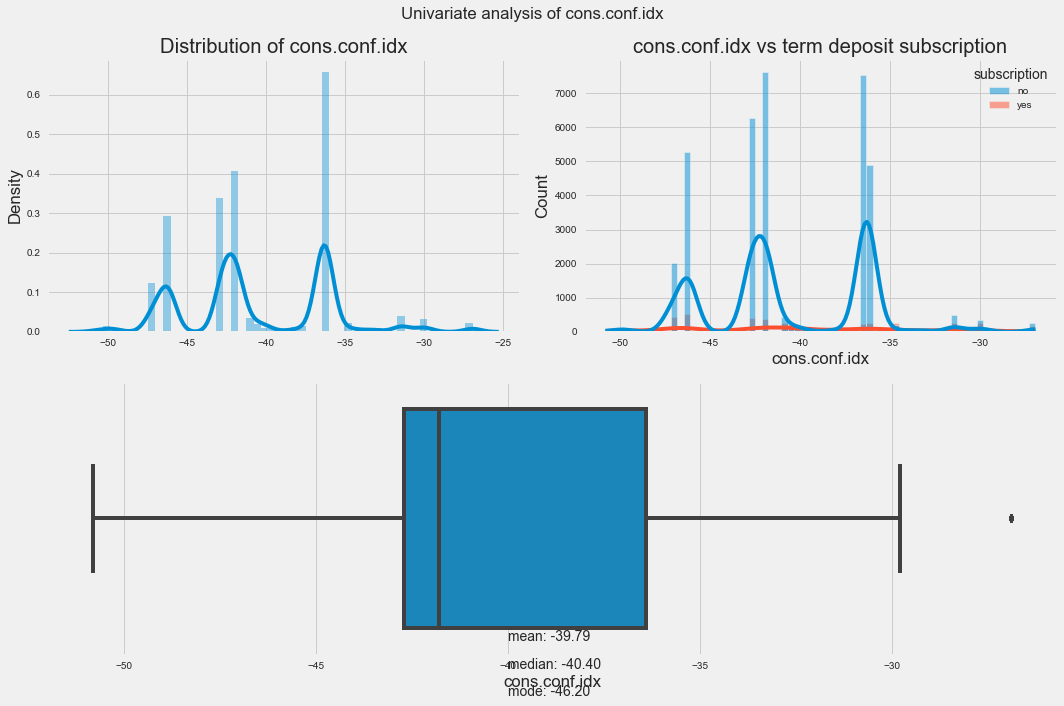

In [41]:
num_plot('cons.conf.idx')

# euribor3m: euribor 3 month rate - daily indicator(average interest rate)

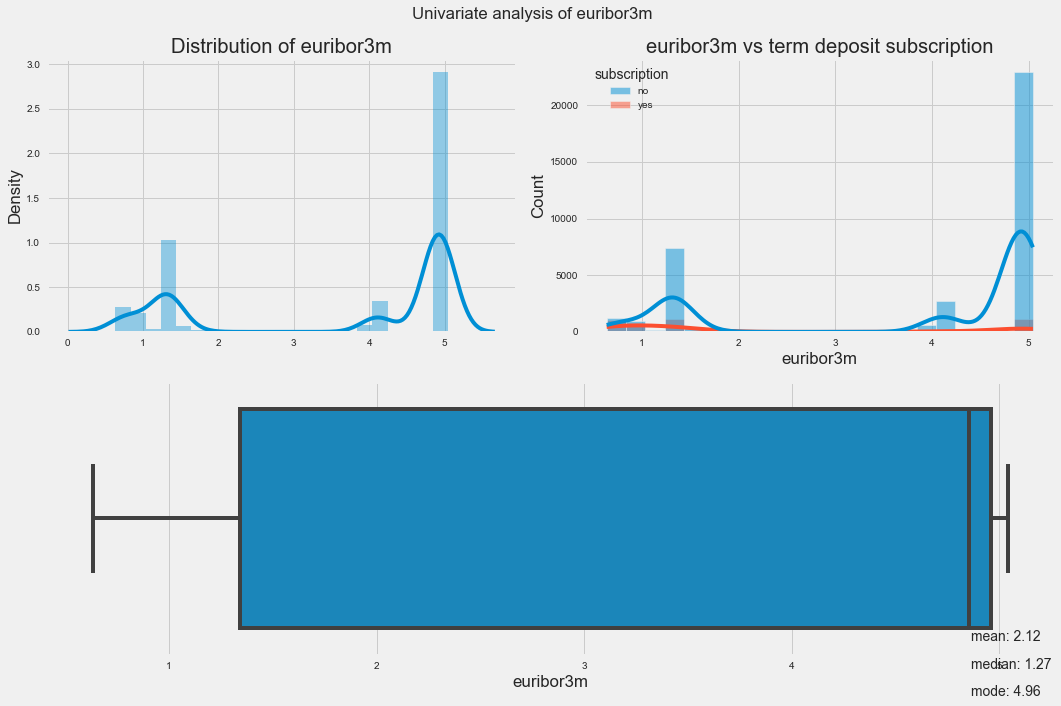

In [42]:
num_plot('euribor3m')

# nr.employed: number of employees - quarterly indicator

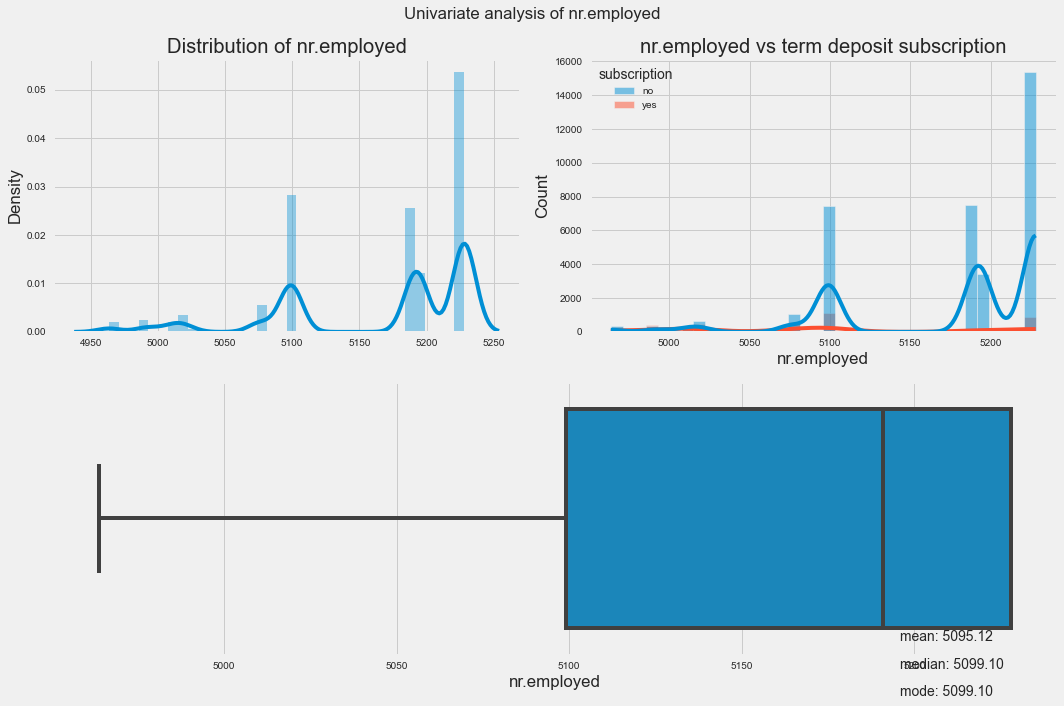

In [43]:
num_plot('nr.employed')

# Bivariate and mutlivariate analysis

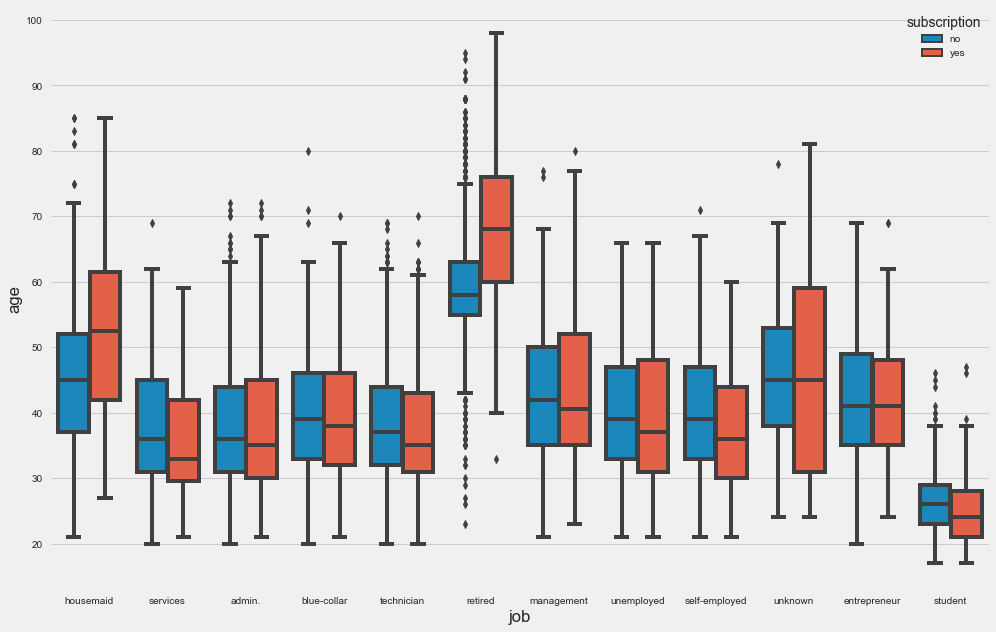

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['job'],y=df['age'],hue=df['subscription'])
plt.show()

In [45]:
m=df.groupby(by='month').count().reset_index()

In [46]:
m=m.sort_values(by='subscription',ascending=False).reset_index(drop=True)

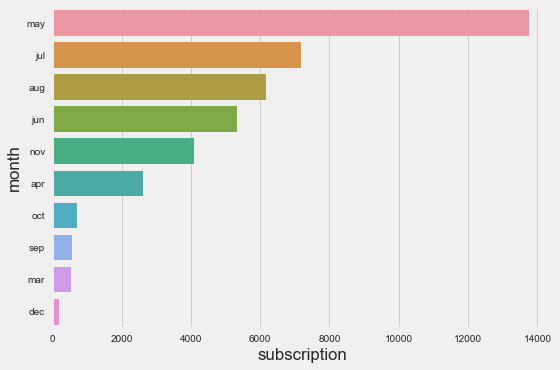

In [47]:
sns.barplot(x='subscription',y='month',data=m)
plt.show()

<Figure size 1080x720 with 0 Axes>

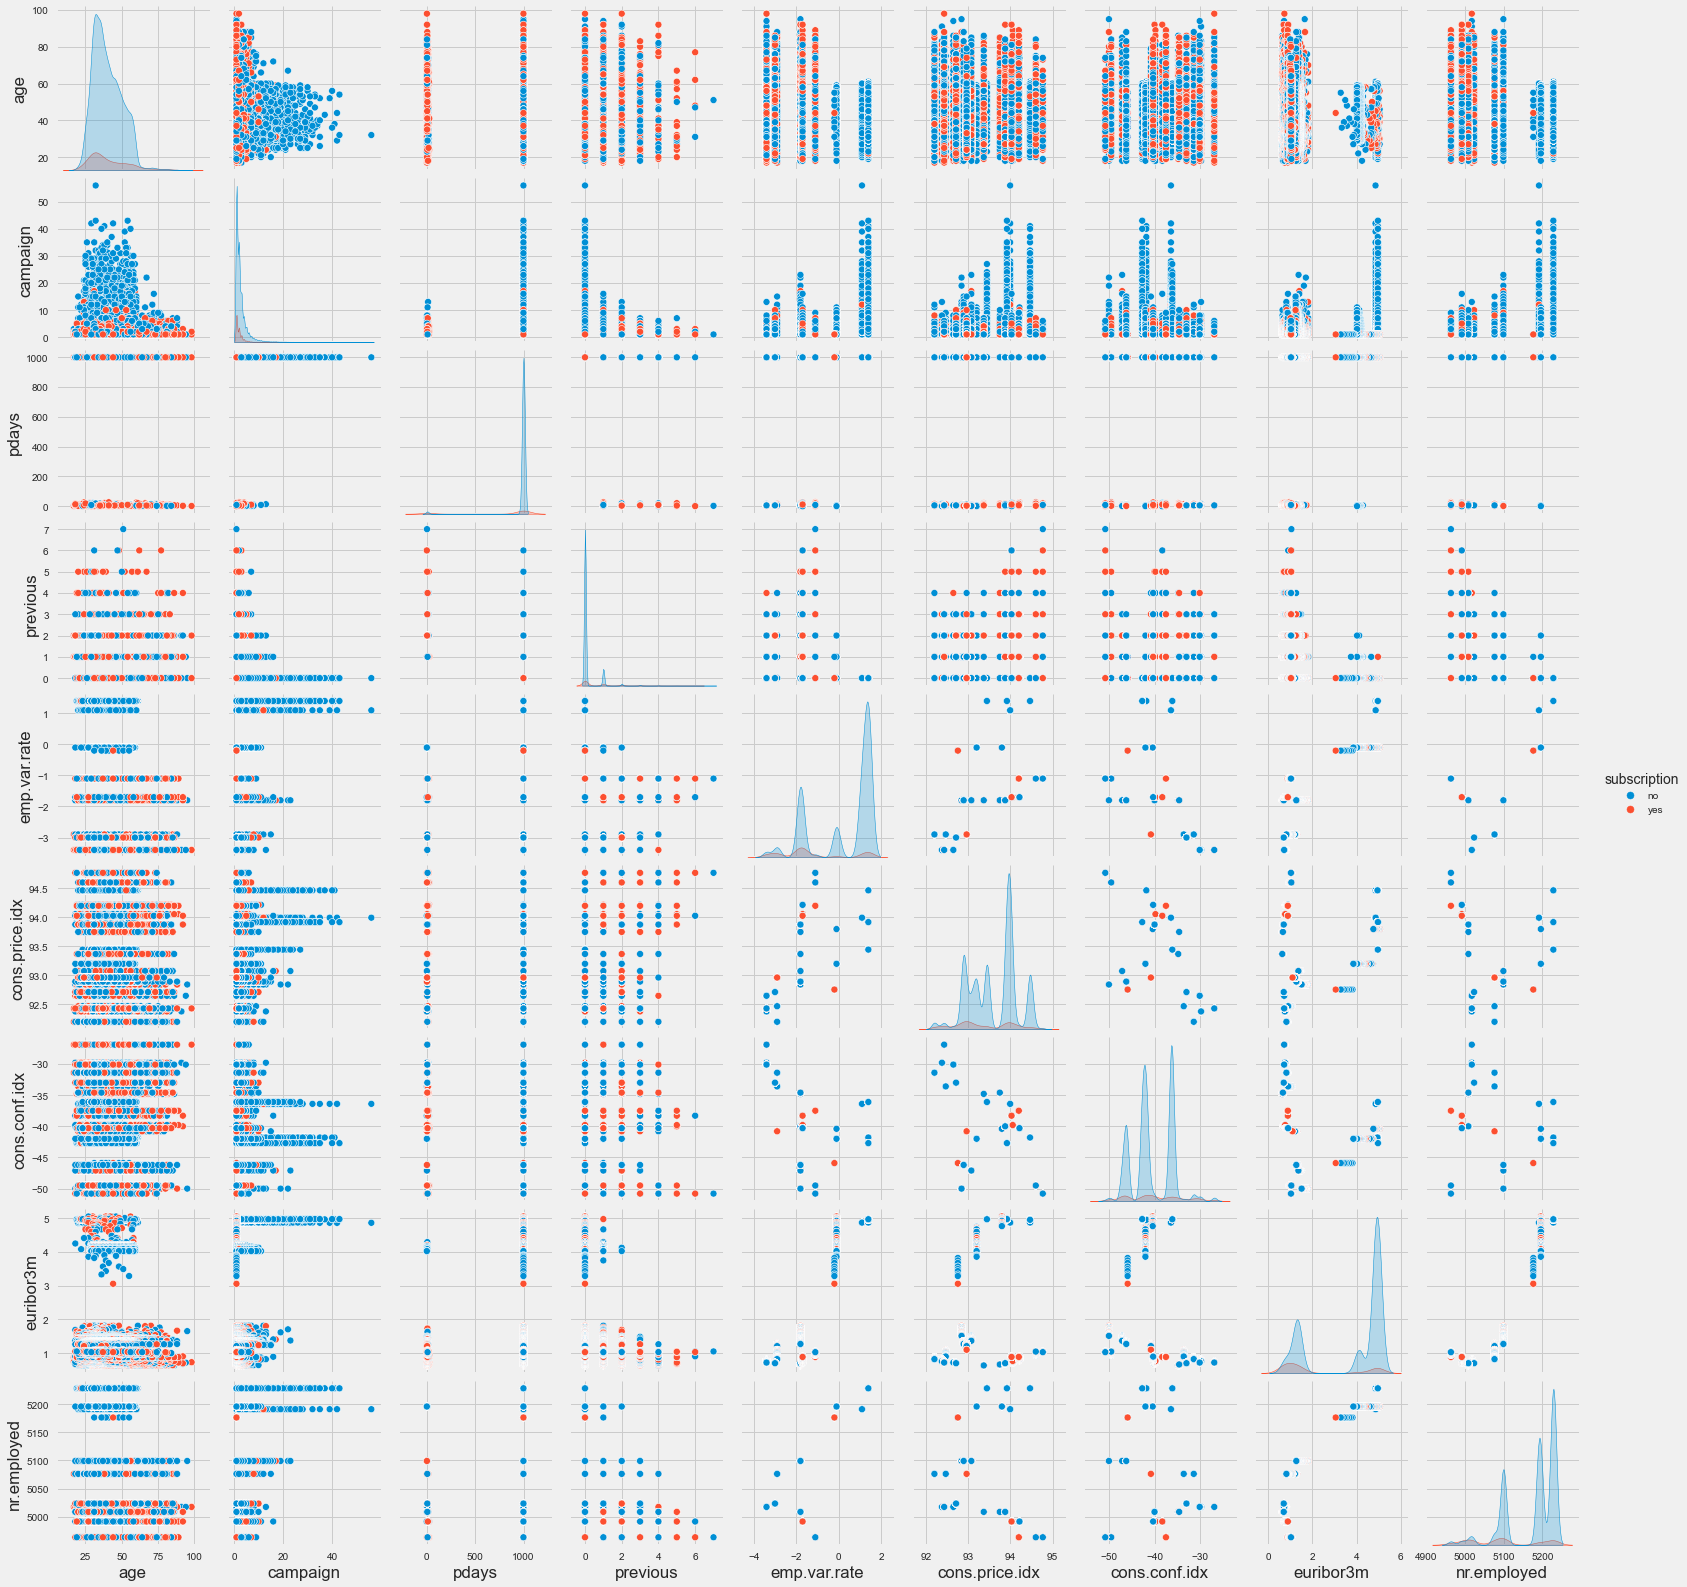

In [49]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue='subscription')
plt.show()

In [50]:
#non linear pattern in dataset,we will go with non linear classification models

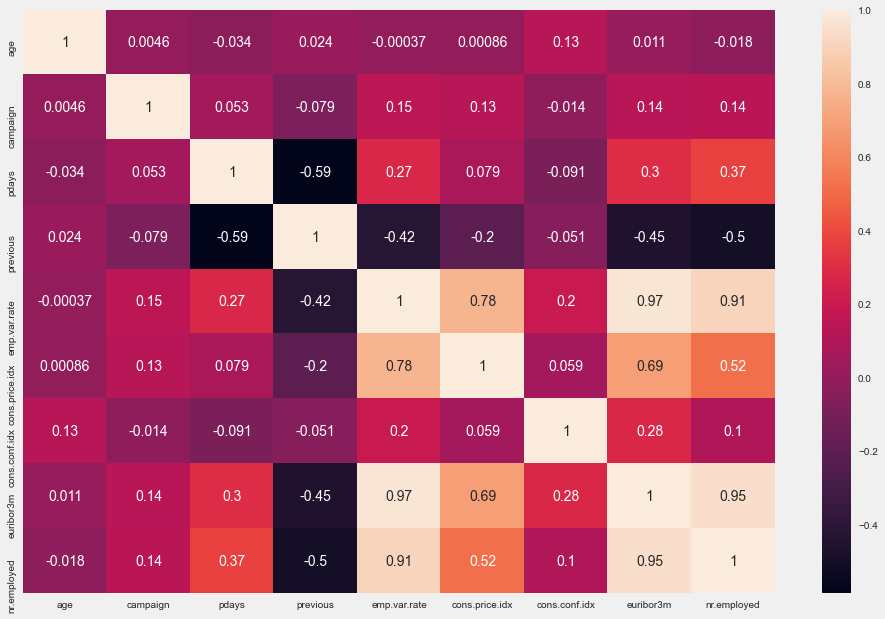

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [52]:
#pdays and previous have correlation of 0.59
#emp.var.rate has correlation with cons.price.idx,euribor3m,nr.employed
#cons.price.idx has correlation with emp.var.rate,euribor,nr.employed
#euribor has strong correlation with emp.var.rate, and also has relation with cons.price.index,nr.employed
#nr.employed with emp.var.rate,cons.price.idx,euribor3m

In [53]:
#emp.var.rate,cons.price.idx,euribor,nr.employed---multicollinearity features

# Inference